In [30]:
#importing the required modules for linear regression
import pandas as pd
import matplotlib.pyplot as pyp
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [13]:
#reading the dataset
df=pd.read_csv("data.csv")

In [14]:
df.head()

,Unnamed: 0,x,y
0,0,77.0,79.775152
1,1,21.0,23.177279
2,2,22.0,25.609262
3,3,20.0,17.857388
4,4,36.0,41.849864


In [ ]:
#we dont need the unnamed: 0 column 
df.drop('Unnamed: 0',axis=1,inplace=True)

In [22]:
#checking if there are any null values exist
df.isna().sum()

x    0
y    1
dtype: int64

In [23]:
#removing the null valued row since we have more number of rows 
df.dropna(inplace=True)


In [24]:
#checking
df.isna().sum()

x    0
y    0
dtype: int64

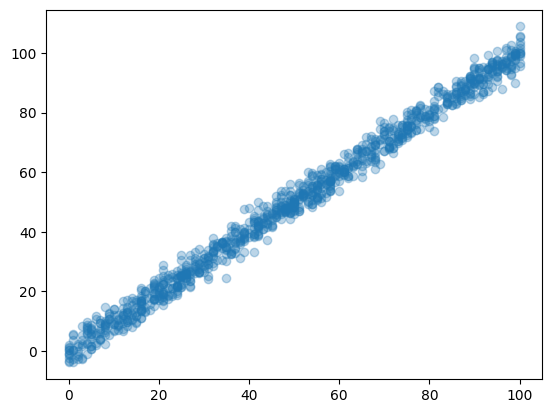

In [25]:
#plotting the x,y points
pyp.scatter(df['x'],df['y'],alpha=0.3)

In [26]:
#by observing the data points we can simply say that the linear regression fits the model in the best way.
#before applying linear regression we have to split the dataframe into training and testing set to find the model accuracy

In [29]:
#now i am manually splitting the dataframe into tain_test
df=df.sample(frac=1)
index=int(0.8*len(df))
train=df[:index]
test=df[index:]

#### we can also split the datasset into train_test using the sklearn library

x_train,x_test,y_train,y_test=train_test_split(df['x'],df['y'],test_size=0.2)

In [37]:
model=LinearRegression()
model.fit(train[['x']],train['y'])

LinearRegression()

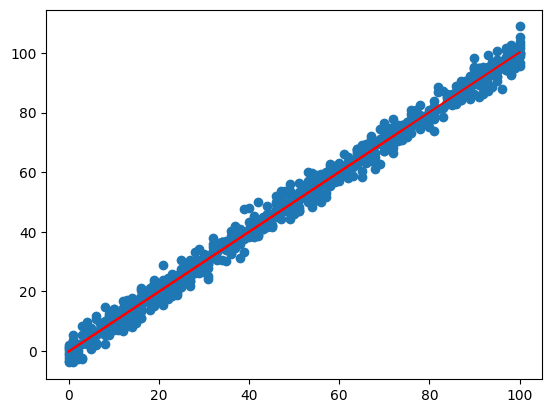

In [41]:
#visualizing the model
m=model.coef_
b=model.intercept_
pyp.scatter(train['x'],train['y'])
pyp.plot(train['x'],m*train['x']+b,c='red')

In [44]:
#the model is now ready for prediction
#predict the value for 39
model.predict([[39]])

/home/srinivas/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([38.97197264])

In [54]:
#finding the model accuracy... to find out weather the model is best fit or not to predict
#to know that we have to predict the values for the test set and find the mean squared error for the oringinal values 
predict=model.predict(test[['x']])
mse = mean_squared_error(test['y'],predict)
print("the mean squared error is :",mse)

the mean squared error is : 10.308731452253278


In [ ]:
#the mse is 10 so the model is good for predictig the future values.